<a href="https://colab.research.google.com/github/Sriharish19/Bike-Demand-Prediction/blob/main/SH_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'unicode_escape')
df1 = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'unicode_escape')


In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [11]:
#Replacing space with underscore in column names
df.columns=[x.replace(' ','_') for x in df.columns]

In [12]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [13]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [14]:
df['Rented_Bike_Count'].sum()

6172314

In [15]:
cc=['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)','Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
    'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)']

In [16]:
list(enumerate(cc))

[(0, 'Rented_Bike_Count'),
 (1, 'Temperature(°C)'),
 (2, 'Humidity(%)'),
 (3, 'Wind_speed_(m/s)'),
 (4, 'Visibility_(10m)'),
 (5, 'Dew_point_temperature(°C)'),
 (6, 'Solar_Radiation_(MJ/m2)'),
 (7, 'Rainfall(mm)'),
 (8, 'Snowfall_(cm)')]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

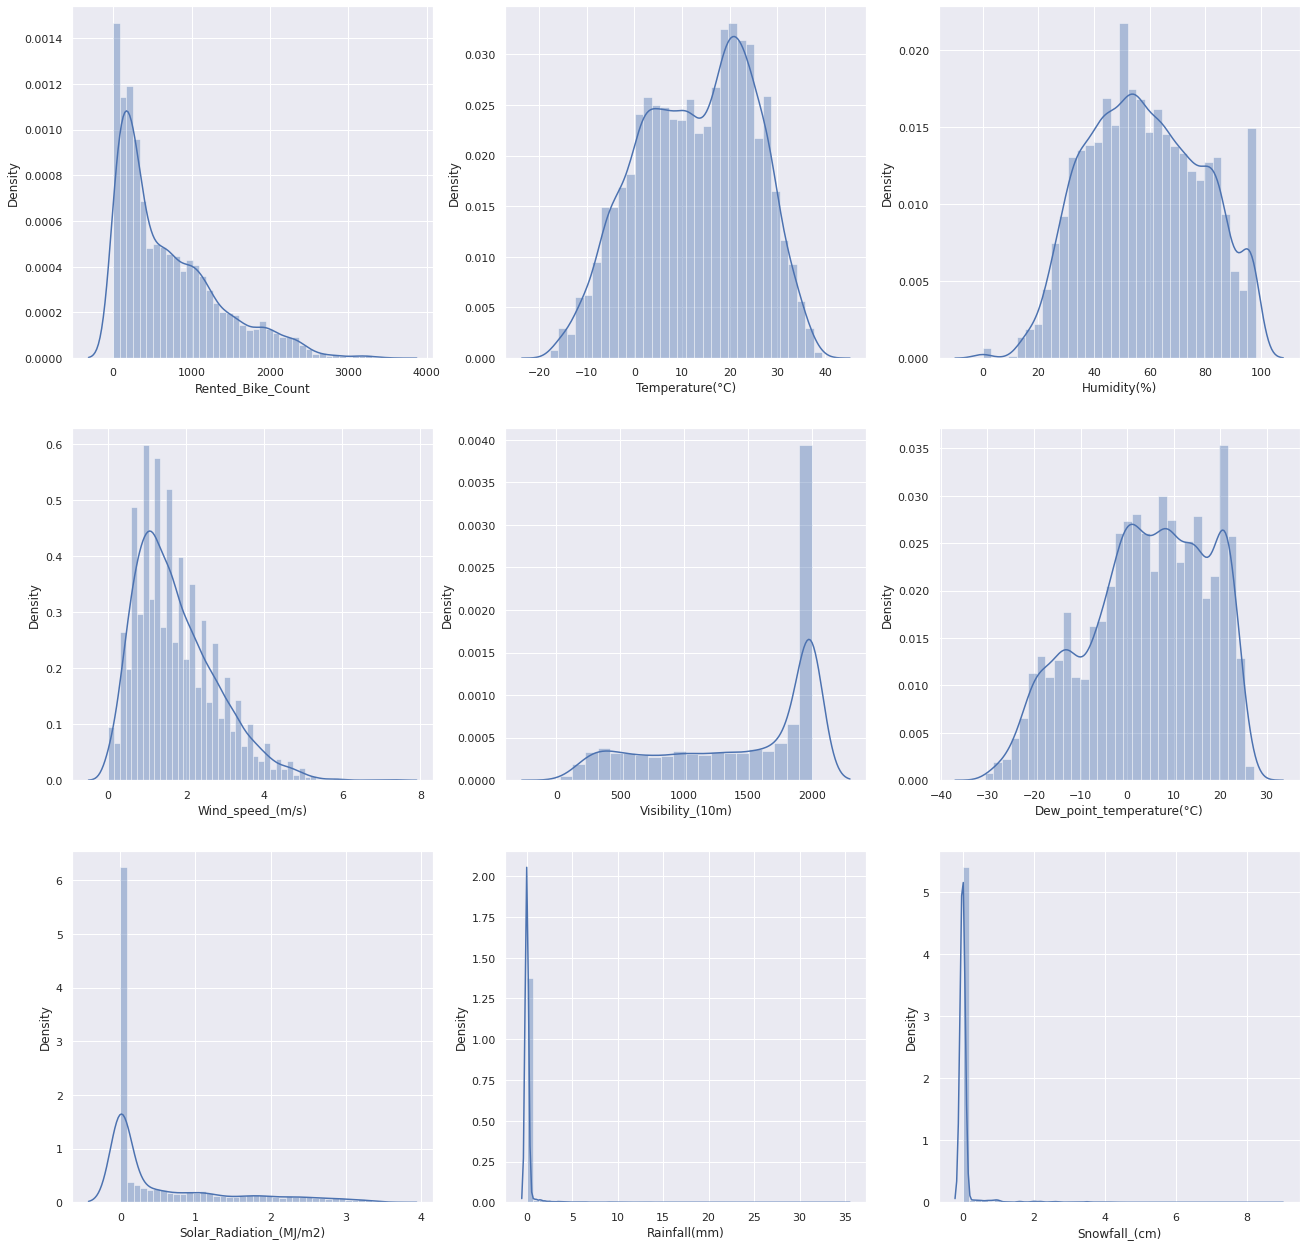

In [17]:
#Distribution plots of independent variables 
plt.figure(figsize = (22,22 ))
sns.set_theme()
for i in enumerate(cc):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df[i[1]])

In [18]:
df.corr()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Day,Month,Year
Rented_Bike_Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.229091e-02,1.335139e-01,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.450952e-16,1.749134e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,1.564544e-02,2.161826e-01,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-2.904392e-02,1.398748e-01,3.592468e-02
Wind_speed_(m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.197744e-02,-1.567102e-01,-3.780878e-03
Visibility_(10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.017585e-01,6.487420e-02,5.238110e-02
Dew_point_temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,1.525311e-04,2.425519e-01,3.363497e-01
Solar_Radiation_(MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.981839e-03,-3.159544e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.623338e-03,1.195810e-02,2.752192e-02
Snowfall_(cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.020774e-01,5.312091e-02,-2.064178e-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count according to Holidays')

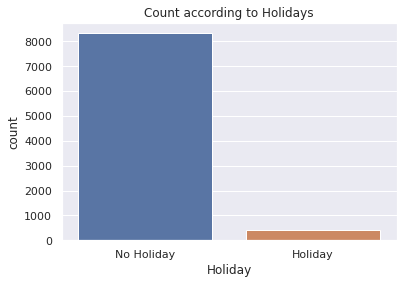

In [19]:
sns.countplot(df['Holiday']).set_title('Count according to Holidays')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Demand by Functioning day')

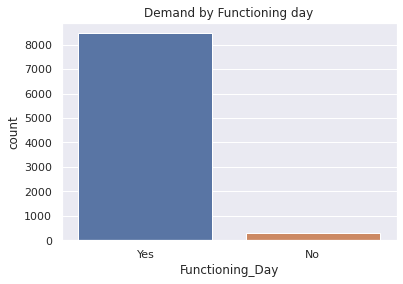

In [20]:
sns.countplot(df['Functioning_Day']).set_title('Demand by Functioning day')

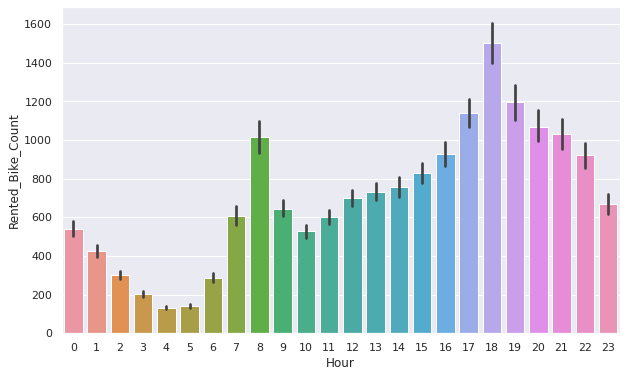

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented_Bike_Count',data=df)

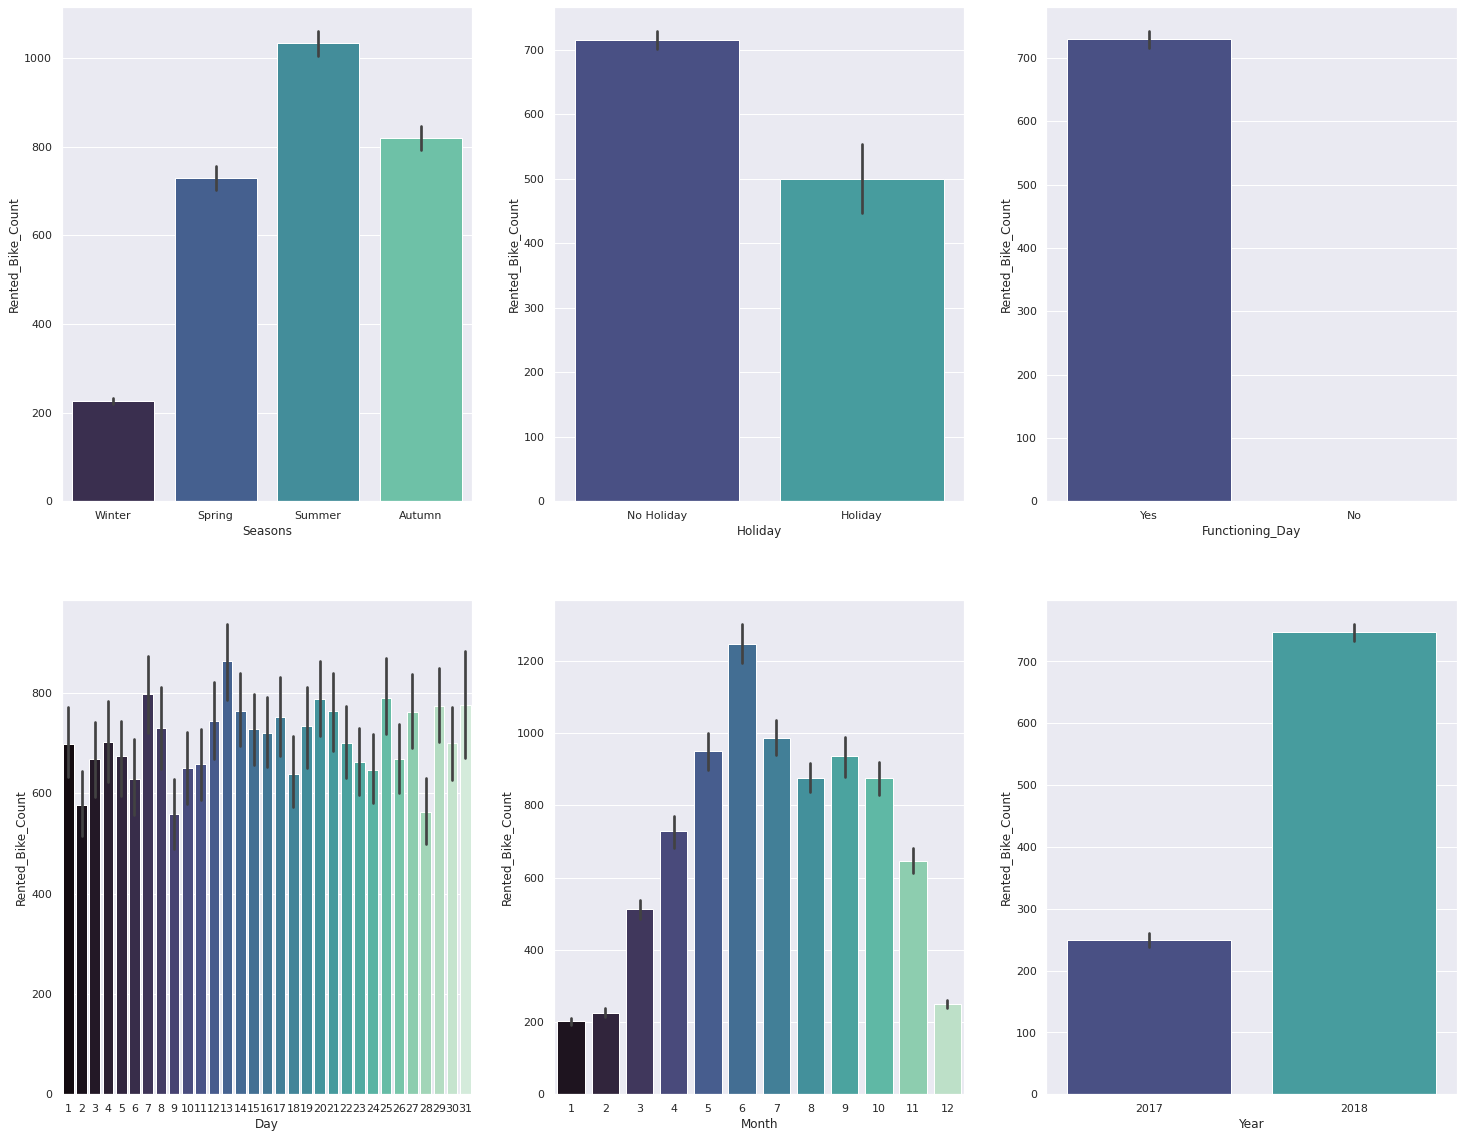

In [22]:
dd= ['Seasons',	'Holiday',	'Functioning_Day',	'Day',	'Month',	'Year']
plt.figure(figsize = (25, 20))
for i in enumerate(dd):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x=df[i[1]],y='Rented_Bike_Count',data=df,palette='mako')

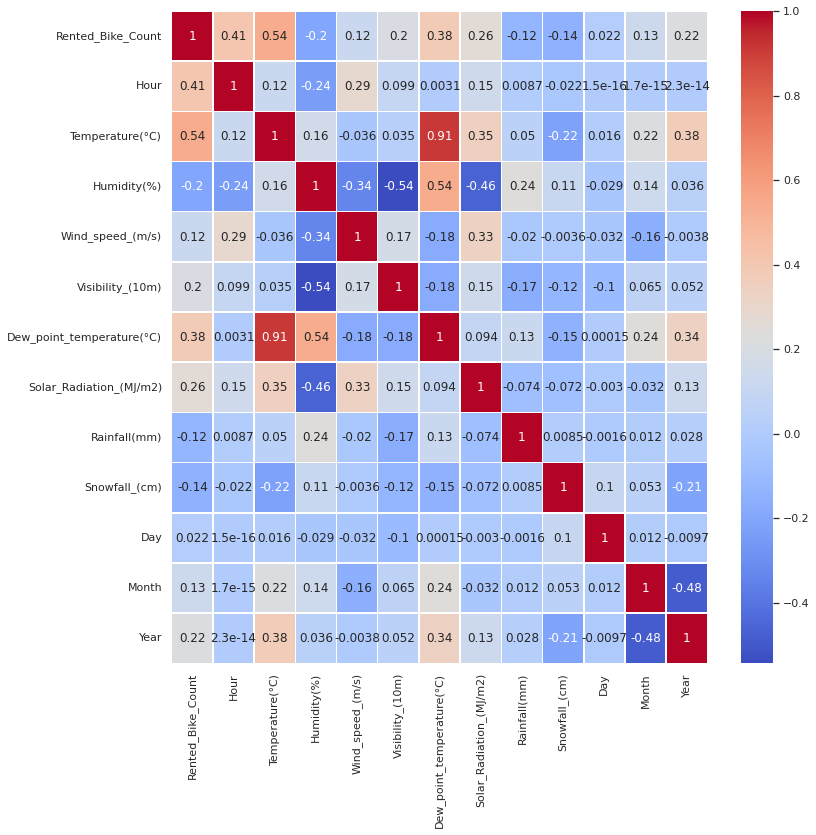

In [23]:
#Corelation map

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5 , ax=ax,cmap="coolwarm")
plt.show()

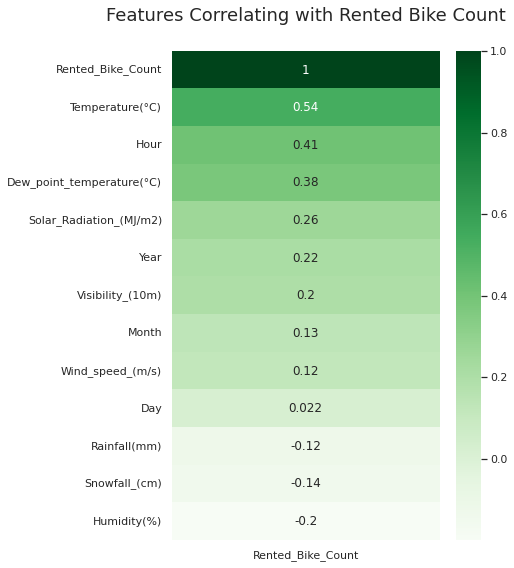

In [24]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(df.corr()[['Rented_Bike_Count']].sort_values(by='Rented_Bike_Count',ascending=False),
                       annot=True,cmap='Greens')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=30);

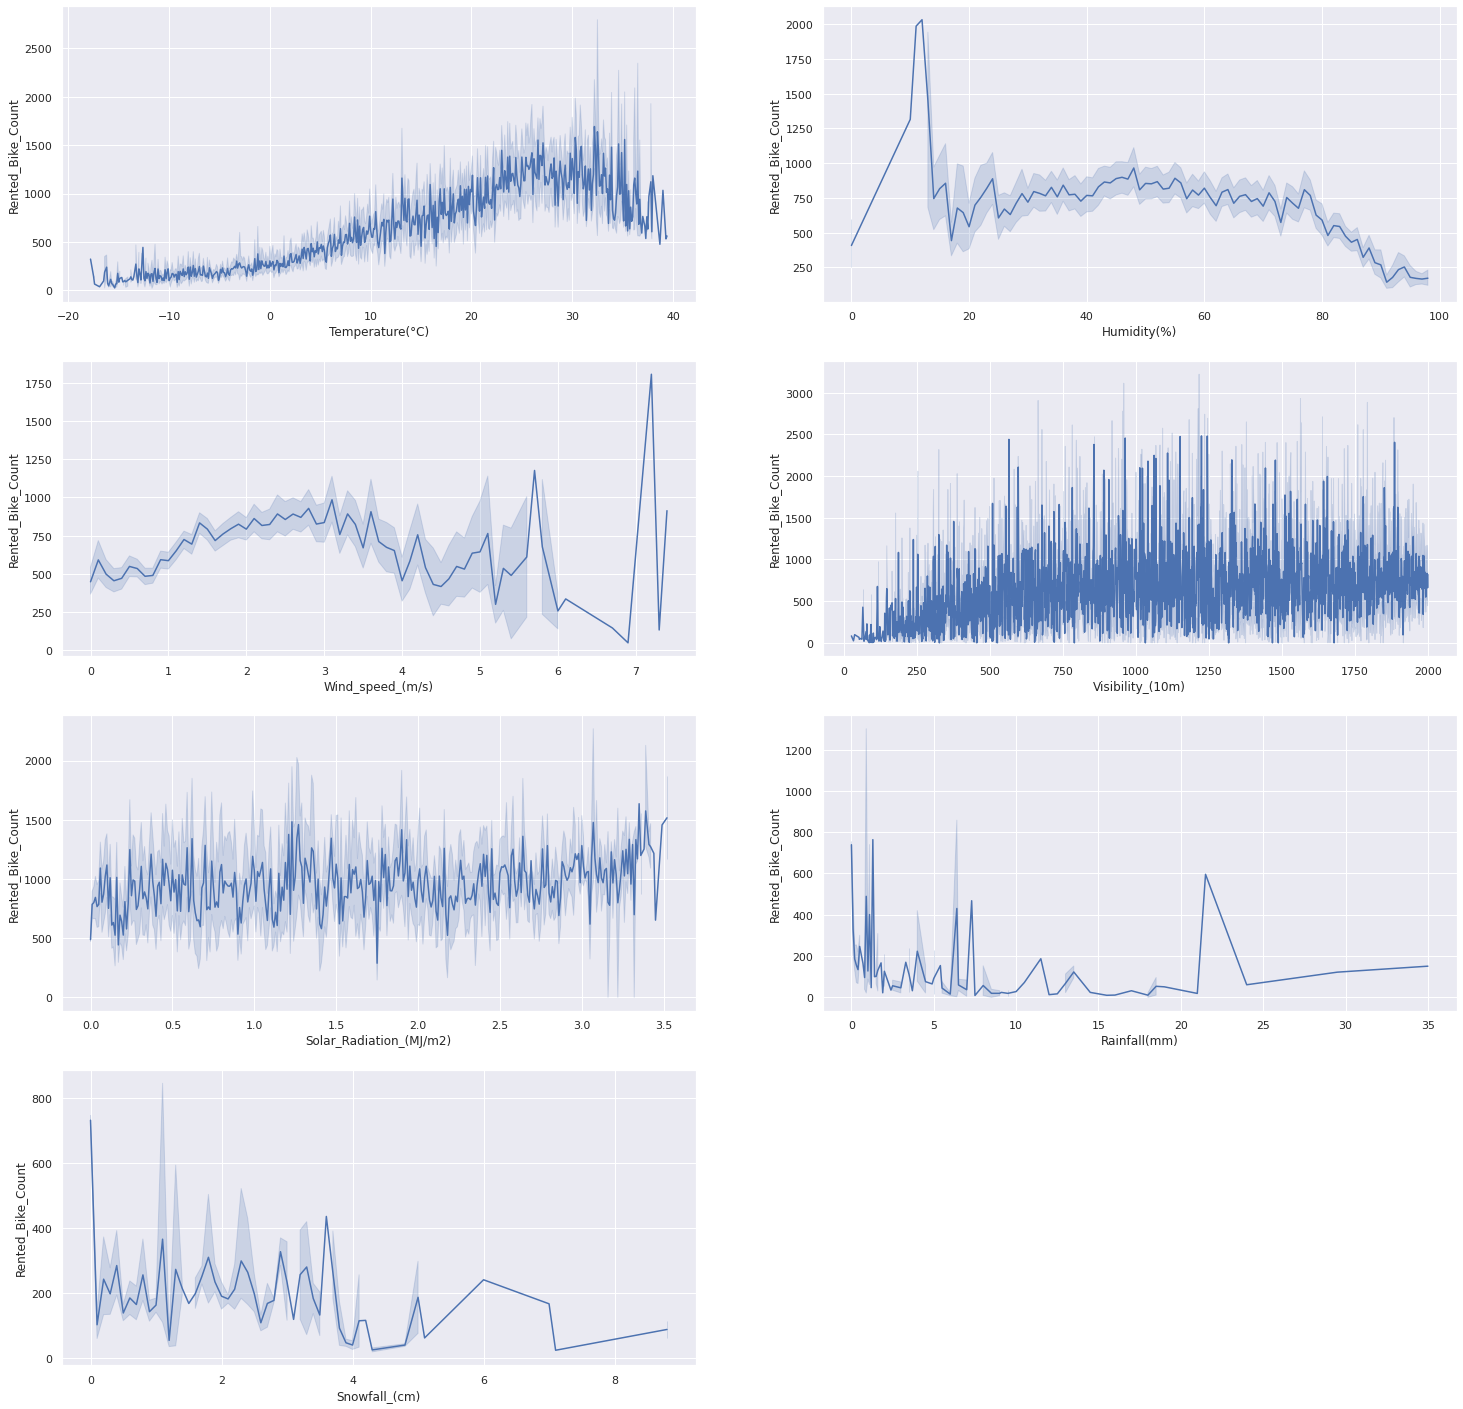

In [ ]:
ee = ['Temperature(°C)',	'Humidity(%)',	'Wind_speed_(m/s)',	'Visibility_(10m)',	'Solar_Radiation_(MJ/m2)',	'Rainfall(mm)',	'Snowfall_(cm)']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 25))
for i in enumerate(ee):
  plt.subplot(4,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='Rented_Bike_Count',data=df,palette='Grouped')

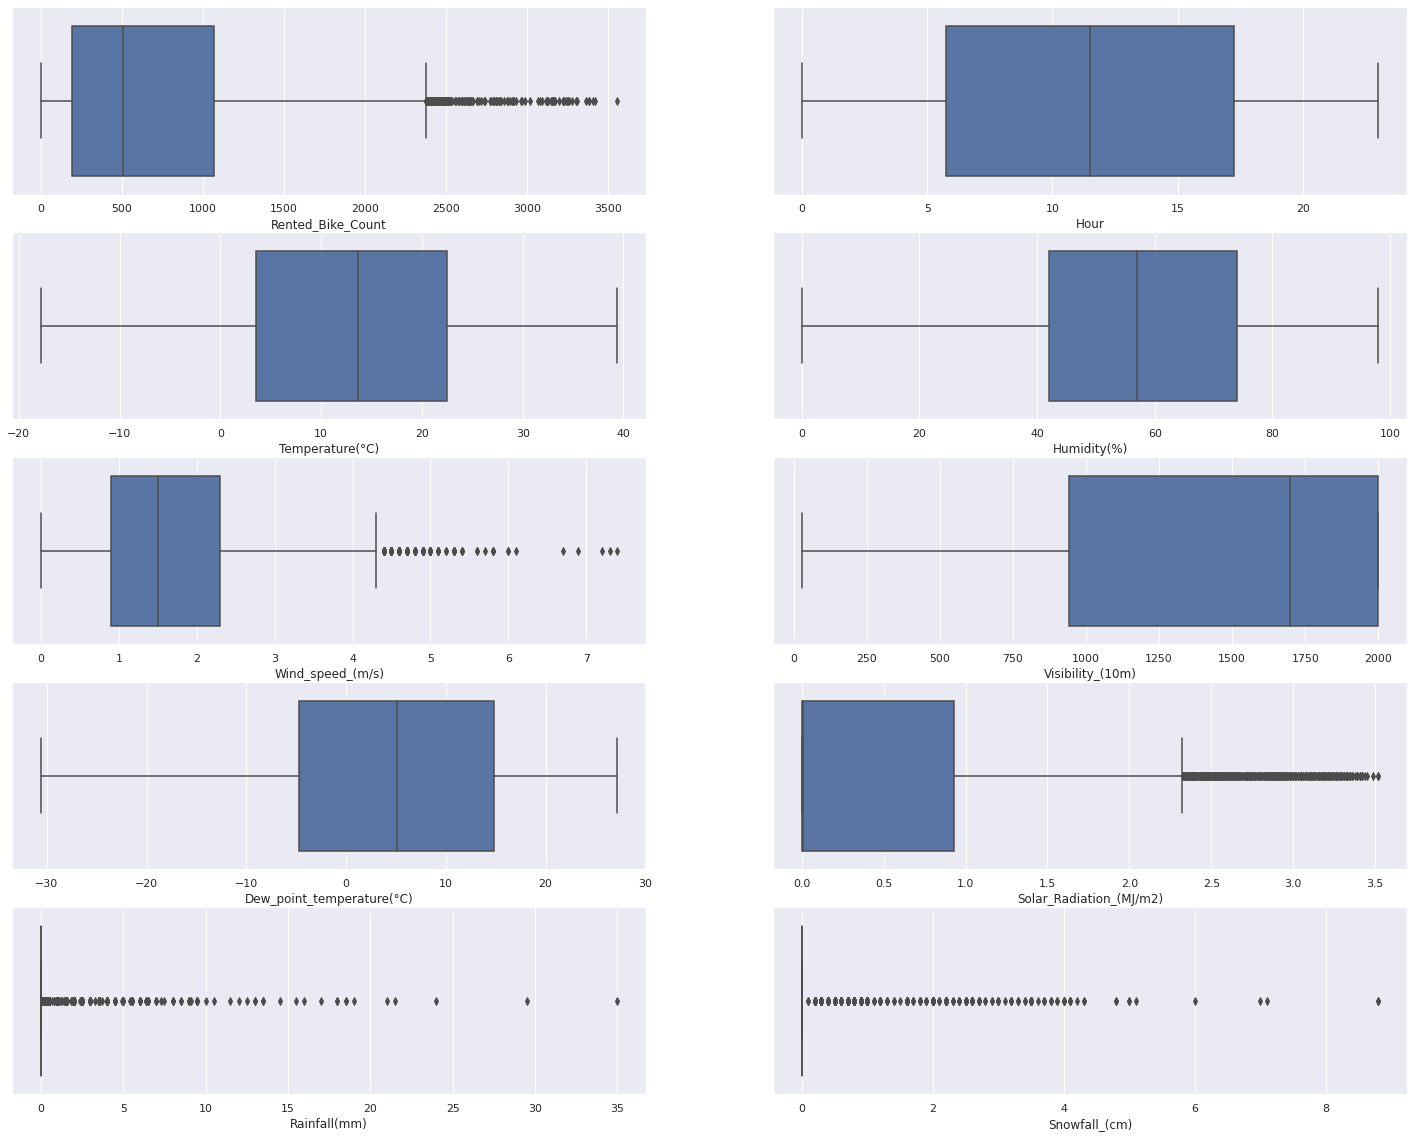

In [25]:
#Outlier detection graph

lst=[ 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)']
       
plt.figure(figsize = (25, 20))
for i in enumerate(lst):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [26]:
df.groupby('Functioning_Day').count()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Day,Month,Year
Functioning_Day,,,,,,,,,,,,,,,,
No,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
Yes,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465


In [27]:
df.groupby('Functioning_Day').sum()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Day,Month,Year
Functioning_Day,,,,,,,,,,,,,
No,0,3333,4747.4,17846,500.6,448855,2292.2,178.41,40.2,0.0,3618,2662,595310
Yes,6172314,97407,108107.0,492216,14609.6,12137739,33394.4,4807.00,1262.3,657.6,134094,54506,17081626


In [28]:
df2=df

In [29]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented_Bike_Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind_speed_(m/s)           8760 non-null   float64       
 6   Visibility_(10m)           8760 non-null   int64         
 7   Dew_point_temperature(°C)  8760 non-null   float64       
 8   Solar_Radiation_(MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall_(cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented_Bike_Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind_speed_(m/s)         8760 non-null   float64 
 5   Visibility_(10m)         8760 non-null   int64   
 6   Solar_Radiation_(MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall_(cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   category
 10  Holiday                  8760 non-null   category
 11  Functioning_Day          8760 non-null   category
 12  Day                      8760 non-null   category
 13  Month                    8760 non-null   category
dtypes: categ

In [31]:
df2.drop(['Date','Dew_point_temperature(°C)','Year'],axis=1,inplace=True)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind_speed_(m/s)         8760 non-null   float64
 5   Visibility_(10m)         8760 non-null   int64  
 6   Solar_Radiation_(MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall_(cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning_Day          8760 non-null   object 
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   int64  
dtypes: float64(5), int64(6),

In [33]:
#Converting to categorical variables
catcol=['Hour','Month','Seasons','Holiday','Functioning_Day','Day']
for col in catcol:
  df2[catcol]=df2[catcol].astype('category')

In [34]:
df3=df

In [35]:
#Performing one hot encoding for categorical variables
def create_dummy(dataframe, col):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[col], prefix=col, drop_first=True)], axis=1)
    dataframe = dataframe.drop([col], axis=1)
    return dataframe

for i in catcol:
    df3 = create_dummy(df3, i)


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind_speed_(m/s)         8760 non-null   float64
 4   Visibility_(10m)         8760 non-null   int64  
 5   Solar_Radiation_(MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall_(cm)            8760 non-null   float64
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7                  

In [37]:
X = df3.drop(columns=['Rented_Bike_Count'], axis=1)
y = (df3['Rented_Bike_Count'])

In [38]:
X.shape

(8760, 76)

In [39]:
y.shape

(8760,)

In [79]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)

    print(f'R^2 is {model.score(X_train,y_train)}')
    print(f'Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_train,y_pred_train,squared=False)}')
    print(' ')    
    print(f'R^2 is {model.score(X_test,y_test)}')
    print(f'Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_test,y_pred_test,squared=False)}')

In [80]:
predict(LinearRegression(),X,y)

R^2 is 0.7000272013544746
Adj R^2 is 0.696516045848998
RMSE is: 353.0648557935034
 
R^2 is 0.7002661026163128
Adj R^2 is 0.6894853282664973
RMSE is: 353.5844024076333


In [81]:
predict(Ridge(),X,y)

R^2 is 0.6998486738912355
Adj R^2 is 0.6963354287373364
RMSE is: 353.1699026475329
 
R^2 is 0.6993193301889056
Adj R^2 is 0.68850450250048
RMSE is: 354.1423973942012


In [82]:
predict(Lasso(),X,y)

R^2 is 0.6936826871535527
Adj R^2 is 0.6900972696614336
RMSE is: 356.7790330886913
 
R^2 is 0.6937256731606927
Adj R^2 is 0.6827096538328237
RMSE is: 357.4213290935707


In [83]:
predict(DecisionTreeRegressor(),X,y)

R^2 is 1.0
Adj R^2 is 1.0
RMSE is: 0.0
 
R^2 is 0.7440573665718131
Adj R^2 is 0.7348516684456692
RMSE is: 326.73562197389293


In [45]:
predict(RandomForestRegressor(),X,y)

R^2 is 0.8633773571566093
Adj R^2 is 0.8584633387675428
RMSE is: 238.7187377909648


In [46]:
df4=df

In [50]:
df4.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Solar_Radiation_(MJ/m2)',
       'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons', 'Holiday',
       'Functioning_Day', 'Day', 'Month'],
      dtype='object')

In [53]:
df4.drop(['Day', 'Month'],axis=1,inplace=True)

In [54]:
df4.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Solar_Radiation_(MJ/m2)',
       'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons', 'Holiday',
       'Functioning_Day'],
      dtype='object')

In [55]:
dv=['Hour','Seasons','Holiday','Functioning_Day']

In [56]:
def create_dummy(dataframe, col):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[col], prefix=col, drop_first=True)], axis=1)
    dataframe = dataframe.drop([col], axis=1)
    return dataframe

for i in dv:
    df4 = create_dummy(df4, i)

In [ ]:
df4.head()

In [60]:
df4.columns

Index(['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Solar_Radiation_(MJ/m2)',
       'Rainfall(mm)', 'Snowfall_(cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes'],
      dtype='object')

In [61]:
X1=df4.drop(['Rented_Bike_Count'],axis=1)

In [62]:
y1=df4['Rented_Bike_Count']

In [84]:
predict(RandomForestRegressor(),X1,y1)

R^2 is 0.9804160169325107
Adj R^2 is 0.9803111134419441
RMSE is: 90.21194883015863
 
R^2 is 0.8556488255868573
Adj R^2 is 0.853303286541147
RMSE is: 245.37783438587022


In [134]:
predict(RandomForestRegressor(max_depth=60, min_samples_leaf=15, min_samples_split=90,n_estimators=100),X1,y1)

R^2 is 0.839117176142645
Adj R^2 is 0.8382553918091575
RMSE is: 258.564199421622
 
R^2 is 0.8109548428128357
Adj R^2 is 0.8078830784202866
RMSE is: 280.8070109234432


In [225]:
predict(RandomForestRegressor(n_estimators=50, criterion="squared_error",
                              max_depth=20, min_samples_split=60, 
                              min_samples_leaf=1),X1,y1)

R^2 is 0.8751607082463568
Adj R^2 is 0.8744919945623382
RMSE is: 227.76616029507295
 
R^2 is 0.8367502255992789
Adj R^2 is 0.8340976062380787
RMSE is: 260.94649228753116


In [ ]:
RandomForestRegressor()

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
predict(GradientBoostingRegressor(),X1,y1)

R^2 is 0.8222259069917872
Adj R^2 is 0.8212736429490435
RMSE is: 271.798958476065
 
R^2 is 0.8037611224253877
Adj R^2 is 0.8005724684258002
RMSE is: 286.0998921059882


In [219]:
n_estimators = [40,50,60]
max_depth = [10,20,30]
min_samples_split = [60,70,80]
min_samples_leaf = [1,3,5]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [220]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.25,random_state=0)

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=40; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=40; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=40; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=40; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=40; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=60, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [60, 70, 80],
                         'n_estimators': [40, 50, 60]},
             verbose=2)

In [105]:
gb_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [222]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=60, n_estimators=60)